# Exploratory Data Analysis (EDA)

Este análisis exploratorio de datos (EDA) investigará las relaciones entre las variables de los conjuntos de datos limpios, identificará outliers y patrones interesantes, y explorará las palabras más frecuentes en los títulos.

## 1. Carga de Datos

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Cargar los datos
movies_df = pd.read_csv('final_data/optimized_movies.csv')
credits_df = pd.read_csv('final_data/optimized_credits.csv')

# Filtrar para que solo queden las filas con `return` mayor a 0
movies_df = movies_df[movies_df['return'] > 0]

# Vista rápida de los datos filtrados
display(movies_df.head())
display(credits_df.head())

,budget,id,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genres_names,release_year,return
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"['Animation', 'Comedy', 'Family']",1995.0,12.451801
1,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"['Adventure', 'Fantasy', 'Family']",1995.0,4.043035
3,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"['Comedy', 'Drama', 'Romance']",1995.0,5.090760
5,60000000.0,949,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,Heat,7.7,1886.0,"['Action', 'Crime', 'Drama', 'Thriller']",1995.0,3.123947
8,35000000.0,9091,International action superstar Jean Claude Van...,5.23158,1995-12-22,64350171.0,106.0,Sudden Death,5.5,174.0,"['Action', 'Adventure', 'Thriller']",1995.0,1.838576


,id,cast_names,cast_characters,crew_names,crew_jobs
0,41366,"['Rutger Hauer', 'Andrew McCarthy', 'Tara Fitz...","['David Marx', 'Kurt Bishop', 'Kris Paddock', ...","['Rick Montgomery', 'Ehren Kruger', 'Humphrey ...","['Casting', 'Writer', 'Production Design', 'Pr..."
1,460846,"['Antonio Banderas', 'Ben Kingsley', 'Liam McI...","[""Eduardo 'Eddie' Deacon"", 'Charlie', 'Vance',...","['Alain Desrochers', 'Tony Mosher', 'John Sull...","['Director', 'Writer', 'Screenplay', 'Co-Produ..."
2,143,"['Lew Ayres', 'Arnold Lucy', 'John Wray', 'Lou...","['Paul', 'Kantorek', 'Himmelstoss', 'Stanislas...","['Lewis Milestone', 'Erich Maria Remarque', 'D...","['Director', 'Novel', 'Adaptation', 'Screenpla..."
3,55823,"['Alberto Sordi', 'Vittorio Gassman', 'Silvana...","['Oreste Jacovacci', 'Giovanni Busacca', 'Cost...","['Nino Rota', 'Dino De Laurentiis', 'Piero Ghe...","['Music', 'Producer', 'Costume Design', 'Story..."
4,38414,"['Marie Gillain', 'Olivier Sitruk', 'Bruno Put...","['Nathalie', 'Eric', 'Bruno', 'Alain', 'Antoin...","['Bertrand Tavernier', 'Morgan Sportes', 'Bert...","['Director', 'Writer', 'Writer', 'Writer']"


## 2. Análisis Estadístico Descriptivo

Analizaremos las estadísticas descriptivas para entender la distribución de las variables numéricas en el conjunto de datos y detectar valores atípicos.

In [5]:
# Estadísticas descriptivas del dataset de películas
movies_df.describe()

,budget,revenue,runtime,vote_average,vote_count,release_year,return
count,5.381000e+03,5.381000e+03,5380.000000,5381.000000,5381.000000,5381.000000,5.381000e+03
mean,3.109480e+07,9.031812e+07,109.827695,6.272849,732.309422,1999.757666,5.565899e+03
std,4.016263e+07,1.661423e+08,22.041188,0.927983,1251.520813,15.919325,2.168566e+05
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1915.000000,5.217391e-07
25%,5.037000e+06,7.011317e+06,95.000000,5.700000,77.000000,1994.000000,7.870443e-01
50%,1.700000e+07,2.991874e+07,106.000000,6.300000,276.000000,2004.000000,2.056683e+00
75%,4.000000e+07,9.996575e+07,120.000000,6.900000,798.000000,2011.000000,4.244444e+00
max,3.800000e+08,2.787965e+09,338.000000,9.100000,14075.000000,2017.000000,1.239638e+07


## 3. Visualización de Outliers y Distribuciones

Usaremos boxplots y histogramas para identificar posibles outliers y entender la distribución de las variables principales, como el presupuesto (`budget`), los ingresos (`revenue`) y el retorno (`return`).

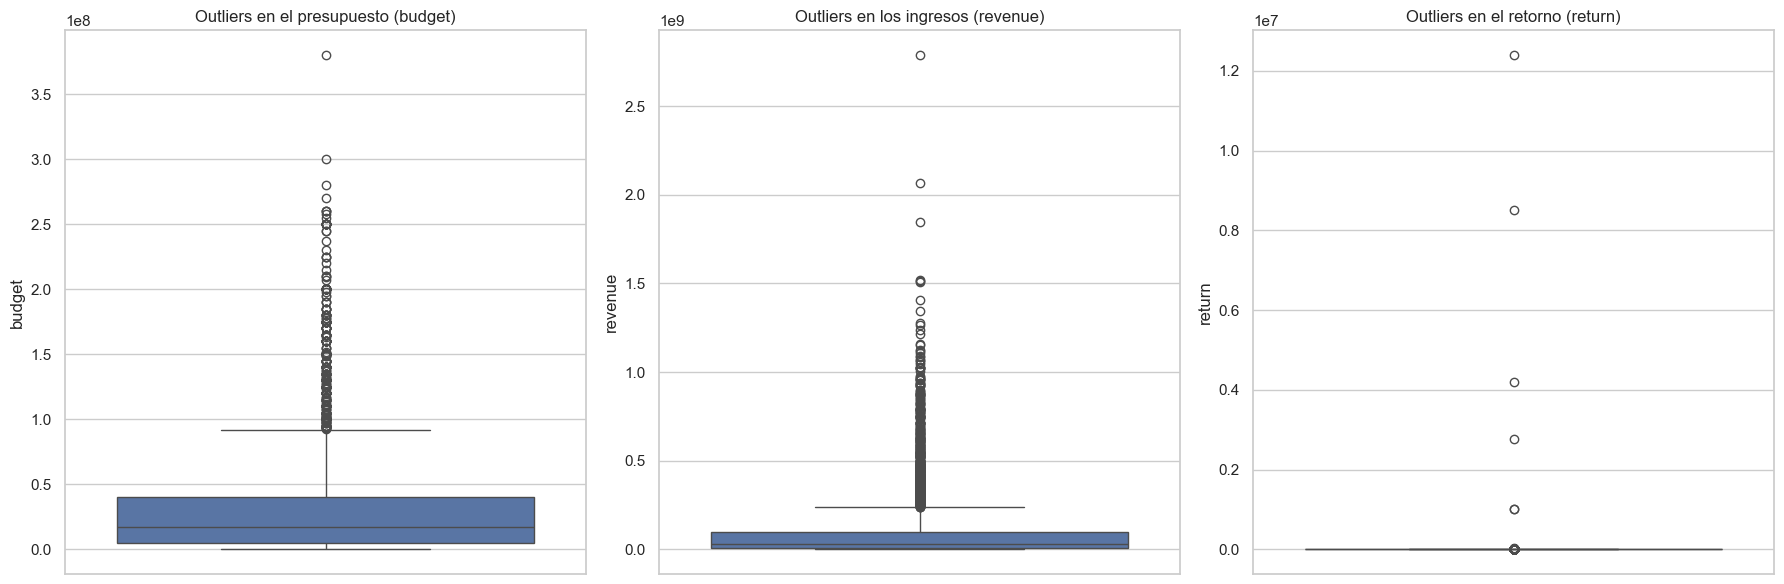

In [6]:
# Boxplot para identificar outliers en las variables principales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=movies_df['budget'], ax=axes[0])
axes[0].set_title('Outliers en el presupuesto (budget)')

sns.boxplot(y=movies_df['revenue'], ax=axes[1])
axes[1].set_title('Outliers en los ingresos (revenue)')

sns.boxplot(y=movies_df['return'], ax=axes[2])
axes[2].set_title('Outliers en el retorno (return)')

plt.tight_layout()
plt.show()

## 4. Análisis de Correlaciones entre Variables

Exploraremos las correlaciones entre variables numéricas para ver si existen relaciones fuertes que merezcan análisis adicionales.

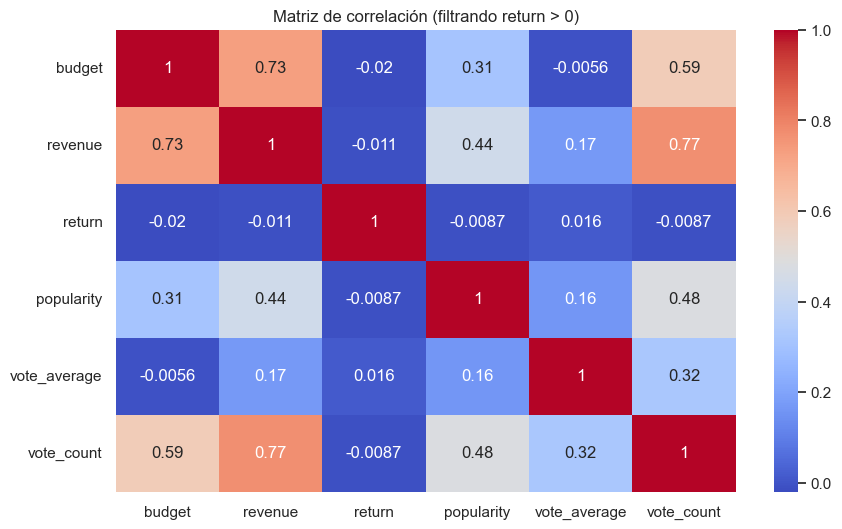

In [7]:
# Asegurarse de que las columnas sean numéricas, convirtiendo valores no numéricos en NaN
columns_to_convert = ['budget', 'revenue', 'return', 'popularity', 'vote_average', 'vote_count']
movies_df[columns_to_convert] = movies_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Matriz de correlación para las variables numéricas en el conjunto filtrado
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df[columns_to_convert].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación (filtrando return > 0)')
plt.show()

## 5. Análisis de Palabras en los Títulos

Generaremos una nube de palabras para identificar las palabras más comunes en los títulos de las películas, lo cual podría ser útil en un sistema de recomendación.

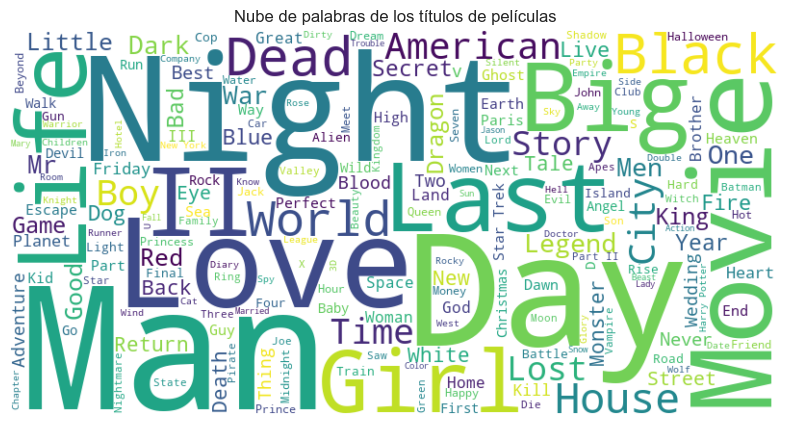

In [8]:
# Generar la nube de palabras para los títulos de películas
all_titles = ' '.join(movies_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de los títulos de películas')
plt.show()

## 6. Conclusión General del EDA

Este EDA muestra una gran diversidad en los datos, con algunas películas que destacan por su alto presupuesto, ingresos o retorno de inversión, mientras que la mayoría tiende a estar en un rango medio o bajo. Las correlaciones indican que, si bien el presupuesto influye en los ingresos, el éxito en términos de retorno de inversión no depende tanto del tamaño del presupuesto. La información obtenida puede ser útil para identificar patrones de éxito y popularidad en películas, así como para construir modelos predictivos o sistemas de recomendación basados en popularidad, presupuestos y temas comunes en los títulos.

-Aunque el promedio de return es alto (~5565), esto se debe a que hay algunos valores extremadamente grandes (con un máximo de 12 millones). La mediana es mucho más baja (alrededor de 2), lo cual sugiere que la mayoría de las películas tienen retornos más modestos, y solo unas pocas alcanzan un retorno muy alto.

-Hay una correlación positiva significativa (0.73) entre el `budget` y el `revenue`, lo cual es esperado ya que, en general, un mayor presupuesto puede dar lugar a una mayor calidad de producción, promoción y, por lo tanto, ingresos.

-Solo una minoría de las películas pertenece a una colección (belongs_to_collection_id tiene solo 1224 valores no nulos de 5381), lo cual podría indicar que las franquicias y series representan una pequeña fracción del total de películas.

-Palabras Frecuentes: La nube de palabras de los títulos muestra palabras como "Night", "Day", "Love", "Man", "Girl", "Last", "Movie", "Time" y "World", lo cual sugiere temas comunes en los títulos de películas. Este análisis podría ser útil en la creación de sistemas de recomendación basados en similitudes en títulos o temas.